In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
train_data = pd.read_csv('training_set_features.csv')
test_data = pd.read_csv('test_set_features.csv')

In [3]:
train_data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
labels = pd.read_csv('training_set_labels.csv')
labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: >

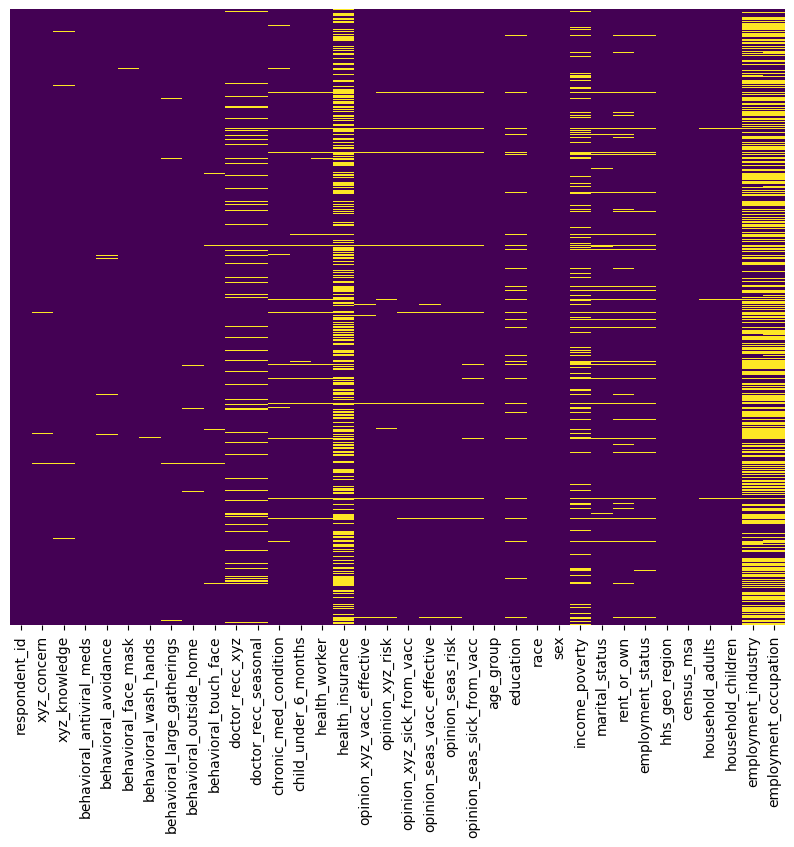

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<Axes: >

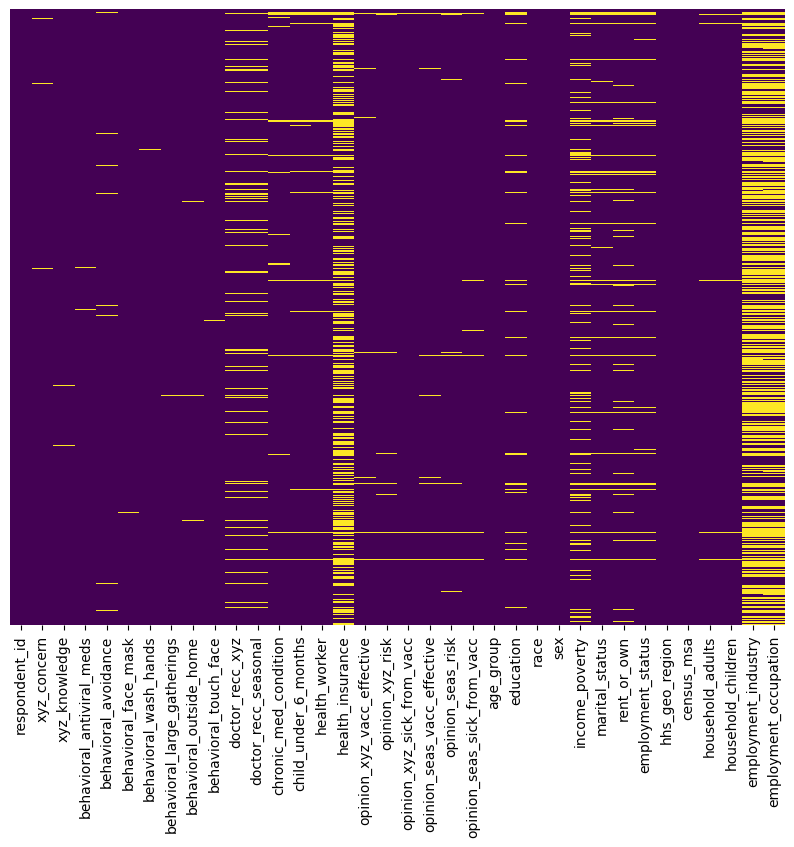

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [7]:
missing_values = train_data.isnull().sum()

In [8]:
missing_values = missing_values[missing_values>0]
missing_values

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

In [112]:
train_data.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance', 'education', 'household_adults', 'xyz_concern',
                         'behavioral_touch_face', 'behavioral_wash_hands', 'behavioral_outside_home', 'rent_or_own'], inplace=True)
test_data.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance', 'education', 'household_adults', 'xyz_concern',
                         'behavioral_touch_face', 'behavioral_wash_hands', 'behavioral_outside_home', 'rent_or_own'], inplace=True)

In [113]:
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categ_cols = train_data.select_dtypes(include='object').columns

numerical_cols_test = test_data.select_dtypes(include=['float64', 'int64']).columns
categ_cols_test = test_data.select_dtypes(include='object').columns


In [114]:
for cols in numerical_cols:
    train_data.fillna({cols:train_data[cols].mode()[0]}, inplace=True)
for cols in numerical_cols_test:
    test_data.fillna({cols:test_data[cols].mode()[0]}, inplace=True)

In [115]:
for cols in categ_cols:
    train_data.fillna({cols:train_data[cols].mode()[0]}, inplace=True)
for cols in categ_cols_test:
    test_data.fillna({cols:test_data[cols].mode()[0]}, inplace=True)

<Axes: >

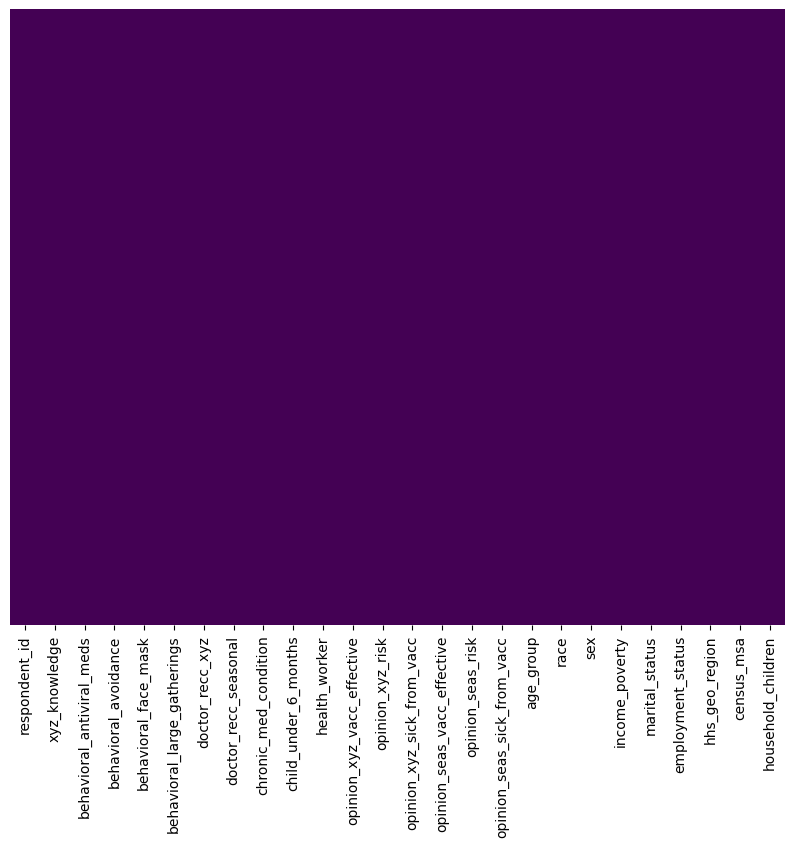

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<Axes: >

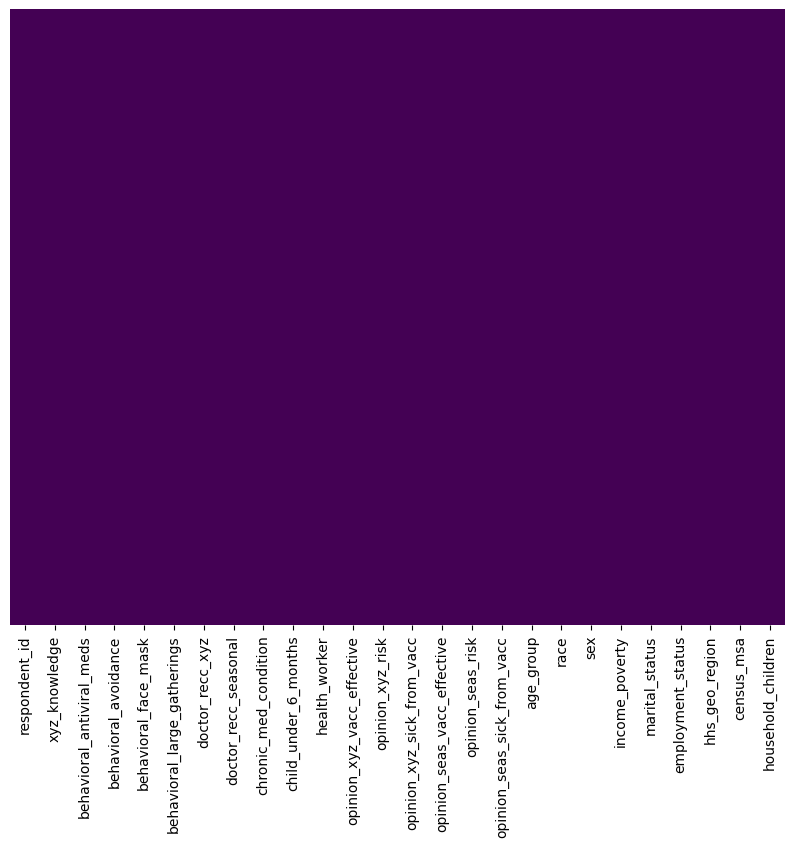

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [119]:
xyz_data = train_data.drop(columns=train_data.columns[(train_data.columns.str.contains('seas'))])

xyz_data_test = test_data.drop(columns=test_data.columns[(test_data.columns.str.contains('seas'))])


In [120]:
seas_data = train_data.drop(columns=train_data.columns[(train_data.columns.str.contains('xyz'))])

seas_data_test = test_data.drop(columns=test_data.columns[(test_data.columns.str.contains('xyz'))])


In [121]:
xyz_data.head()

,respondent_id,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_large_gatherings,doctor_recc_xyz,chronic_med_condition,child_under_6_months,health_worker,...,opinion_xyz_sick_from_vacc,age_group,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region,census_msa,household_children
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,55 - 64 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,0.0
1,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,35 - 44 Years,White,Male,Below Poverty,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",0.0
2,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,"MSA, Not Principle City",0.0
3,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,65+ Years,White,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0
4,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,45 - 54 Years,White,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,"MSA, Not Principle City",0.0


In [122]:
xyz_data = pd.get_dummies(xyz_data, columns=['sex', 'race', 'marital_status', 'census_msa'])
seas_data = pd.get_dummies(seas_data, columns=['sex', 'race', 'marital_status', 'census_msa'])
xyz_data_test = pd.get_dummies(xyz_data_test, columns=['sex', 'race', 'marital_status', 'census_msa'])
seas_data_test = pd.get_dummies(seas_data_test, columns=['sex', 'race', 'marital_status', 'census_msa'])

In [123]:
xyz_data.head()

,respondent_id,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_large_gatherings,doctor_recc_xyz,chronic_med_condition,child_under_6_months,health_worker,...,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,True
1,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,True,False,True,True,False,False
2,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,True,False,False,False,True,False,True,True,False,False
3,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,True,False,True,False,True,False
4,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,True,False,True,False,False


In [19]:
xyz_data.dtypes

respondent_id                            int64
xyz_knowledge                          float64
behavioral_antiviral_meds              float64
behavioral_avoidance                   float64
behavioral_face_mask                   float64
behavioral_large_gatherings            float64
doctor_recc_xyz                        float64
chronic_med_condition                  float64
child_under_6_months                   float64
health_worker                          float64
opinion_xyz_vacc_effective             float64
opinion_xyz_risk                       float64
opinion_xyz_sick_from_vacc             float64
age_group                               object
income_poverty                          object
employment_status                       object
hhs_geo_region                          object
household_children                     float64
sex_Female                                bool
sex_Male                                  bool
race_Black                                bool
race_Hispanic

In [124]:
bool_cols = xyz_data.select_dtypes(include=['bool']).columns
bool_cols2 = seas_data.select_dtypes(include=['bool']).columns
bool_cols_test = xyz_data_test.select_dtypes(include=['bool']).columns
bool_cols2_test = seas_data_test.select_dtypes(include=['bool']).columns
for cols in bool_cols:
    xyz_data[cols] = xyz_data[cols].astype(int)
for cols in bool_cols2:
    seas_data[cols] = seas_data[cols].astype(int)
for cols in bool_cols_test:
    xyz_data_test[cols] = xyz_data_test[cols].astype(int)
for cols in bool_cols2_test:
    seas_data_test[cols] = seas_data_test[cols].astype(int)

In [125]:
xyz_data_test.dtypes

respondent_id                            int64
xyz_knowledge                          float64
behavioral_antiviral_meds              float64
behavioral_avoidance                   float64
behavioral_face_mask                   float64
behavioral_large_gatherings            float64
doctor_recc_xyz                        float64
chronic_med_condition                  float64
child_under_6_months                   float64
health_worker                          float64
opinion_xyz_vacc_effective             float64
opinion_xyz_risk                       float64
opinion_xyz_sick_from_vacc             float64
age_group                               object
income_poverty                          object
employment_status                       object
hhs_geo_region                          object
household_children                     float64
sex_Female                               int32
sex_Male                                 int32
race_Black                               int32
race_Hispanic

In [126]:
object_cols = xyz_data.select_dtypes(include=['object']).columns
object_cols2 = seas_data.select_dtypes(include=['object']).columns
object_cols_test = xyz_data_test.select_dtypes(include=['object']).columns
object_cols2_test = seas_data_test.select_dtypes(include=['object']).columns

In [127]:
for cols in object_cols:
    xyz_data[cols] = xyz_data[cols].astype('category')
    xyz_data[cols] = xyz_data[cols].cat.codes
for cols in object_cols2:
    seas_data[cols] = seas_data[cols].astype('category')
    seas_data[cols] = seas_data[cols].cat.codes
for cols in object_cols_test:
    xyz_data_test[cols] = xyz_data_test[cols].astype('category')
    xyz_data_test[cols] = xyz_data_test[cols].cat.codes
for cols in object_cols2_test:
    seas_data_test[cols] = seas_data_test[cols].astype('category')
    seas_data_test[cols] = seas_data_test[cols].cat.codes

In [128]:
xyz_data_test.head()

,respondent_id,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_large_gatherings,doctor_recc_xyz,chronic_med_condition,child_under_6_months,health_worker,...,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,26707,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,1,0,0
1,26708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,1
2,26709,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
3,26710,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
4,26711,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1


<Axes: >

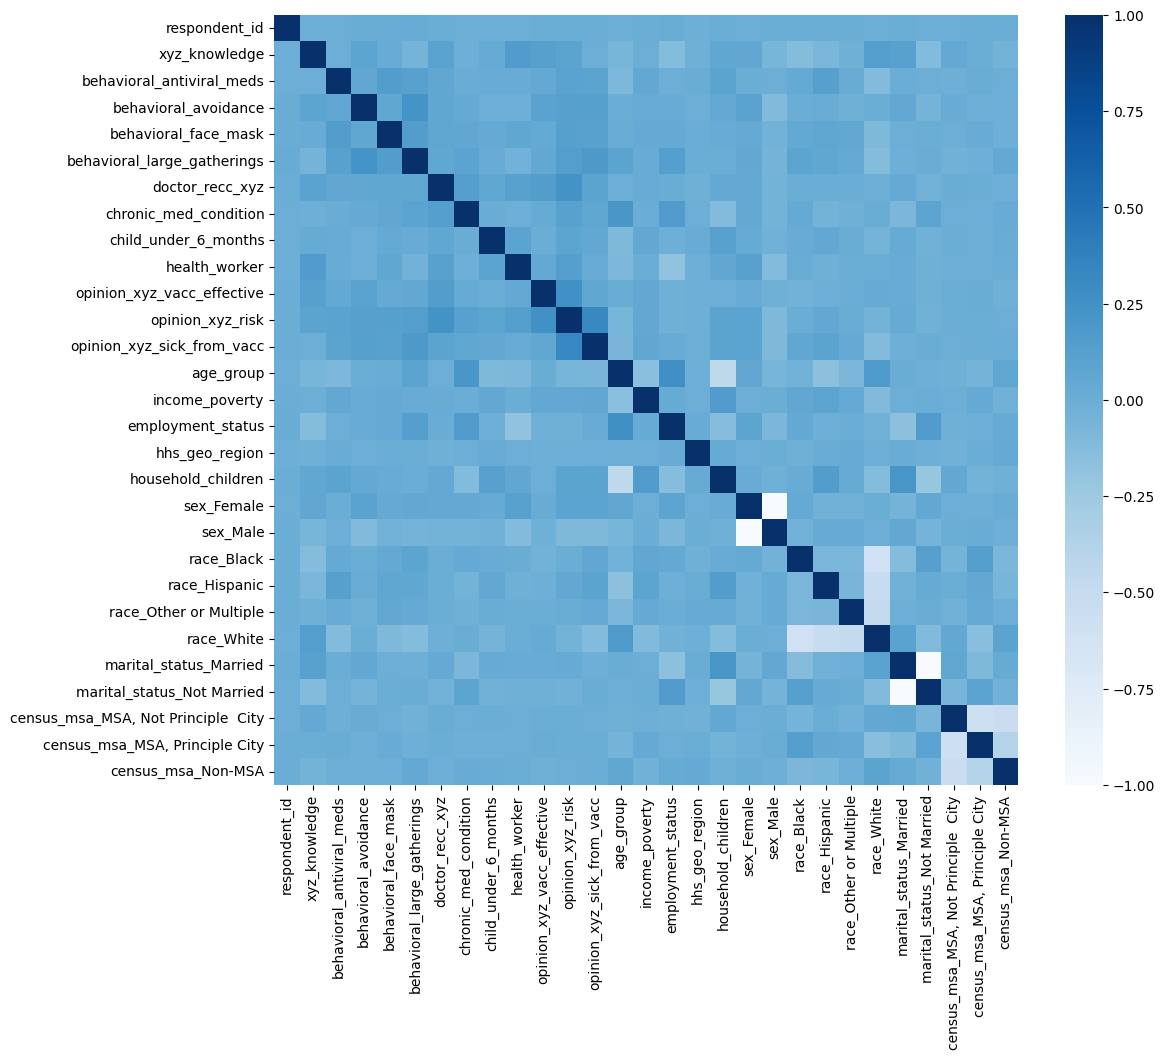

In [129]:
plt.figure(figsize=(12, 10))
sns.heatmap(xyz_data_test.corr(), cmap='Blues', annot=False)

In [130]:
X = xyz_data
X_test = xyz_data_test
y = labels.iloc[:, 1]
X1 = seas_data
X1_test = seas_data_test
y1 = labels.iloc[:, 2]

In [78]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X1_train_scaled=scaler.fit_transform(X1_train)
#X1_test_scaled = scaler.transform(X1_test)

In [93]:
#from sklearn.linear_model import LogisticRegression
#classification = LogisticRegression(max_iter=10000)

In [94]:
#classification.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [95]:
#y_pred1=classification.predict(X_test_scaled)


In [96]:
#classification.fit(X1_train_scaled, y1_train)
#y_pred12=classification.predict(X1_test_scaled)

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
#auc_score_lr = roc_auc_score(y_test, y_pred1)
#auc_score_lr1 = roc_auc_score(y1_test, y_pred12)

In [99]:
#auc_score_lr, auc_score_lr1

(0.6778231601240451, 0.7755721653011839)

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [101]:
#gnb.fit(X_train_scaled, y_train)


GaussianNB()

In [102]:
#y_pred2 = gnb.predict(X_test_scaled)


In [103]:
#gnb.fit(X1_train_scaled, y1_train)
#y_pred22 = gnb.predict(X1_test_scaled)

In [104]:
#auc_score_gnb = roc_auc_score(y_test, y_pred2)
##auc_score_gnb, auc_score_gnb1

(0.71545752128348, 0.7351109493682698)

In [40]:
#from sklearn.naive_bayes import MultinomialNB
#mnb = MultinomialNB()


In [41]:
#mnb.fit(X_train, y_train)

MultinomialNB()

In [43]:
#y_pred3 = mnb.predict(X_test)


In [46]:
#mnb.fit(X1_train, y1_train)
#y_pred23 = mnb.predict(X1_test)

In [47]:
##auc_score_mnb = roc_auc_score(y_test, y_pred3)
##auc_score_mnb1 = roc_auc_score(y1_test, y_pred23)
#auc_score_mnb, auc_score_mnb1

(0.5999377424253541, 0.6396461253258185)

In [50]:
#from sklearn.naive_bayes import BernoulliNB
#bnb = BernoulliNB()

In [51]:
#bnb.fit(X_train, y_train)

BernoulliNB()

In [52]:
#y_pred4 = bnb.predict(X_test)

In [53]:
#bnb.fit(X1_train, y1_train)
#y_pred24 = bnb.predict(X1_test)

In [54]:
# = roc_auc_score(y_test, y_pred4)
#auc_score_bnb1 = roc_auc_score(y1_test, y_pred24)
#auc_score_bnb, auc_score_bnb1

(0.6451235779716392, 0.6815532289469919)

In [61]:
#from sklearn.ensemble import RandomForestClassifier
##rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
#rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
#y_pred5 = rfc.predict(X_test)

In [64]:
#rfc.fit(X1_train, y1_train)
#y_pred25 = rfc.predict(X1_test)

In [65]:
#auc_score_rfc = roc_auc_score(y_test, y_pred5)
#auc_score_rfc1 = roc_auc_score(y1_test, y_pred25)
#auc_score_rfc, auc_score_rfc1#

(0.6652398342428684, 0.7675868901206228)

In [139]:
X_scaled = scaler.fit_transform(X)
X_scaled_test = scaler.transform(X_test)
X1_scaled = scaler.fit_transform(X1)
X1_scaled_test = scaler.transform(X1_test)

In [140]:
X_scaled

array([[-1.73198595, -2.04427905, -0.22629268, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [-1.73185625,  1.19702709, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [-1.73172654, -0.42362598, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       ...,
       [ 1.73172654,  1.19702709, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [ 1.73185625, -0.42362598, -0.22629268, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [ 1.73198595, -2.04427905, -0.22629268, ..., -0.87928249,
         1.54793697, -0.60741906]])

In [135]:
X1_scaled = scaler.fit_transform(X1)
X1_scaled_test = scaler.transform(X1_test)

In [136]:
X1_scaled

array([[-1.73198595, -0.22629268, -1.63495714, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [-1.73185625, -0.22629268,  0.61163683, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [-1.73172654, -0.22629268,  0.61163683, ...,  1.13729093,
        -0.64602114, -0.60741906],
       ...,
       [ 1.73172654, -0.22629268,  0.61163683, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [ 1.73185625, -0.22629268, -1.63495714, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [ 1.73198595, -0.22629268,  0.61163683, ..., -0.87928249,
         1.54793697, -0.60741906]])

In [141]:
gnb.fit(X_scaled, y)

GaussianNB()

In [146]:
Y_pred = gnb.predict_proba(X_scaled_test)[:, 1]

In [147]:
Y_pred

array([0.01838221, 0.00550367, 0.88724948, ..., 0.01936435, 0.05620713,
       0.34500688])

In [148]:
gnb.fit(X1_scaled, y1)

GaussianNB()

In [149]:
Y_pred1 = gnb.predict_proba(X1_scaled_test)[:, 1]
Y_pred1

array([0.00154877, 0.01434938, 0.95616926, ..., 0.11106114, 0.80573594,
       0.58206694])

In [150]:
submission_data = pd.DataFrame({
    'respondent_id': test_data['respondent_id'],
    'xyz_vaccine': Y_pred,
    'seasonal_vaccine': Y_pred1
})
submission_data

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.018382,0.001549
1,26708,0.005504,0.014349
2,26709,0.887249,0.956169
3,26710,0.601996,0.994692
4,26711,0.700405,0.480262
...,...,...,...
26703,53410,0.530137,0.814485
26704,53411,0.398221,0.441088
26705,53412,0.019364,0.111061
26706,53413,0.056207,0.805736


In [152]:
submission_data.to_csv('submission.csv', index=True)